In [51]:
from glob import glob
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from astropy import table
from astropy.io import fits
from datetime import datetime


In [509]:
from astropy.coordinates import EarthLocation,SkyCoord
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz

#observing_location = EarthLocation(lat='52.2532', lon='351.63910339111703', height=100*u.m)  
#observing_time = Time('2017-02-05 20:12:18')  
#aa = AltAz(location=observing_location, obstime=observing_time)

#coord = SkyCoord('4h42m', '-38d6m50.8s')
#coord.transform_to(aa)

In [512]:
#lon = 29*u.deg + 38*u.arcmin + 55*u.arcsec
#lat = 82*u.deg + 20*u.arcmin + 43*u.arcsec

lat = 29.651634*u.deg
lon = -82.324829*u.deg
loc = EarthLocation(lat=lat, lon=lon, height=117*u.m)

In [609]:
data = glob('/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/*.fits')[1:]
#glob(data)
data

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_192232_tint60s_sdr0_fswgalacticplane1.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_193336_tint60s_sdr0_fswgalacticplane1.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_193648_tint60s_sdr0_fswgalacticplane1.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_194024_tint60s_sdr0_fswgalacticplane1.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_194330_tint60s_sdr0_fswgalacticplane2.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_194645_tint60s_sdr0_fswgalacticplane2.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/psd_220922_195016_tint60s_sdr0_fswgalacticplane2.fits',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/Lab

In [610]:
head = fits.open(data[1])[1].header
head

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 2048 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'freq1   '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'freq2   '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'power1  '        

In [611]:
obstime = head['DATE-OBS']
obstime

'220922_193336'

In [612]:
timob = Time(datetime(2000+int(obstime[:2]), int(obstime[2:4]), int(obstime[4:6]), int(obstime[7:9]), int(obstime[9:11]), int(obstime[11:])))
timob

<Time object: scale='utc' format='datetime' value=2022-09-22 19:33:36>

In [613]:
t = Time(datetime(2010, 1, 2, 1, 2, 3))
t

<Time object: scale='utc' format='datetime' value=2010-01-02 01:02:03>

In [614]:
head['--obs_lon']

'-82.3'

In [615]:
head['--obs_lat']

'29.6'

In [616]:
SkyCoord(alt = float(head['--altitude'])*u.deg, az = float(head['--azimuth'])*u.deg, obstime = timob, frame = 'altaz', location = loc).galactic

<SkyCoord (Galactic): (l, b) in deg
    (20.22930367, 52.03153011)>

In [617]:
dat0 = table.Table.read(data[0])
#tbl = table.Table.read('basicCalibration/psd_220922_175815_tint60s_sdr0_fsw50ohm_calibration.fits')
#dat0#['fsw_pow']

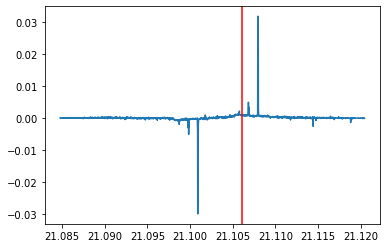

In [618]:
plt.plot((dat0['freq1']*u.Hz).to(u.cm, equivalencies=u.spectral()), dat0['fsw_pow'])#*(dat0['fsw_pow'] < 0.005)*(dat0['fsw_pow'] > -0.005))
#plt.ylim(bottom=-0.005, top=0.005)
plt.axvline(21.106114, color='red')

In [619]:
tes = [-5, 10.5, 26.5, -30, -27, -107, -74, 74, -90]
lin1 = [0]
lin2 = [-186]#[-187, 36]
lin3 = [0, -141]

(-300.0, 200.0)

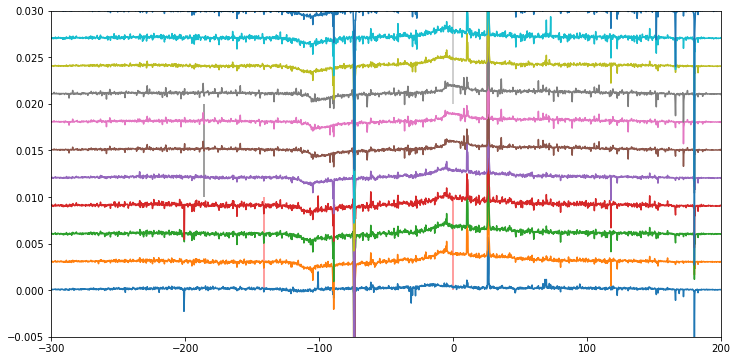

In [629]:
plt.figure(figsize=(12,6))
restfreq = (21.106114*u.cm).to(u.Hz, equivalencies=u.spectral())
freq_to_vel = u.doppler_radio(restfreq)
peaks = []
i=0
for im in data[:]:
    dat = table.Table.read(im)
    plt.plot((dat['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), i+dat['fsw_pow'])#*(dat0['fsw_pow'] < 0.005)*(dat0['fsw_pow'] > -0.005))
    #plt.axvline(restfreq.value, color='red')
    #plt.xlim(21.1, 21.11)
    #plt.show()
    peaks.append((dat['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel)[np.argmax(dat['fsw_pow'])])
    i+=0.003
plt.vlines(lin1, ymin=0.02, ymax=.03, color='grey', label='1', alpha=0.5)
plt.vlines(lin2, ymin=0.01, ymax=.02, color='black', label='2', alpha=0.5)
plt.vlines(lin3, ymin=0, ymax=.01, color='red', label='3', alpha=0.5)
plt.ylim(-0.005, 0.03)
plt.xlim(-300, 200)

In [597]:
tes = [-5, 10.5, 26.5, -30, -27, -107, -74, 74, -90]
tbl = table.Table.read('/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/basicCalibration/psd_220922_175815_tint60s_sdr0_fsw50ohm_calibration.fits')

Text(0, 0.5, 'Intensity')

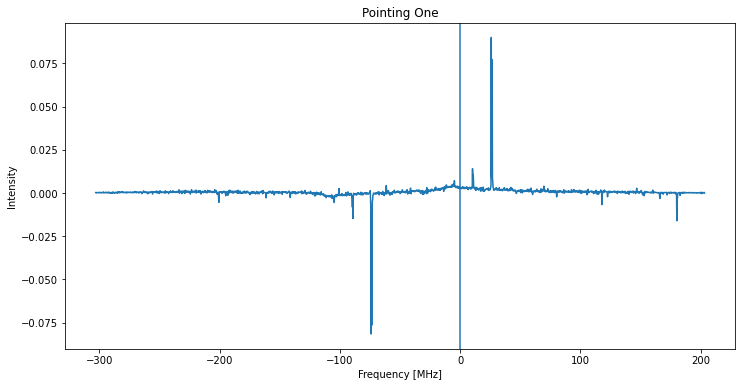

In [653]:
plt.figure(figsize=(12,6))
data_gal1 = []
for dd in data[0:4]:
    dat = table.Table.read(dd)['fsw_pow']#*(dat0['fsw_pow'] < 0.002)*(dat0['fsw_pow'] > -0.002)
    data_gal1.append(dat)
#np.median(data_gal1, axis=0)
#plt.axvline(0, color='red')
#plt.vlines(tes, ymin=-1, ymax=1, color='green')
#plt.xlim(-300, 200)
#plt.ylim(-0.005, 0.006)
plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), np.sum(data_gal1, axis=0))
plt.title('Pointing One')
#plt.axvline(1420.405751, color='red')#*u.MHz)
plt.axvline(0)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Intensity')
#plt.vlines(tes, ymin=-0.01, ymax=0.02)
#plt.plot((tbl['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), tbl['fsw_pow']*10)

Text(0, 0.5, 'Intensity')

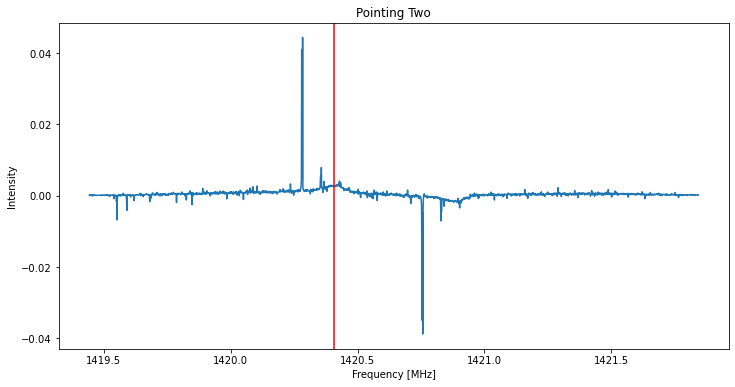

In [672]:
plt.figure(figsize=(12,6))
data_gal2 = []
for dd in data[4:7]:
    dat = table.Table.read(dd)['fsw_pow']#*(dat0['fsw_pow'] < 0.002)*(dat0['fsw_pow'] > -0.002)
    data_gal2.append(dat)
#np.median(data_gal2, axis=0)
#plt.axvline(0, color='red')
#plt.vlines(lin, ymin=-1, ymax=1, color='green')
#plt.xlim(-300, 200)
#plt.ylim(-0.0035, 0.005)
plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.MHz), np.sum(data_gal2, axis=0))
plt.title('Pointing Two')
plt.axvline(1420.405751, color='red')#*u.MHz)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Intensity')

Text(0, 0.5, 'Intensity')

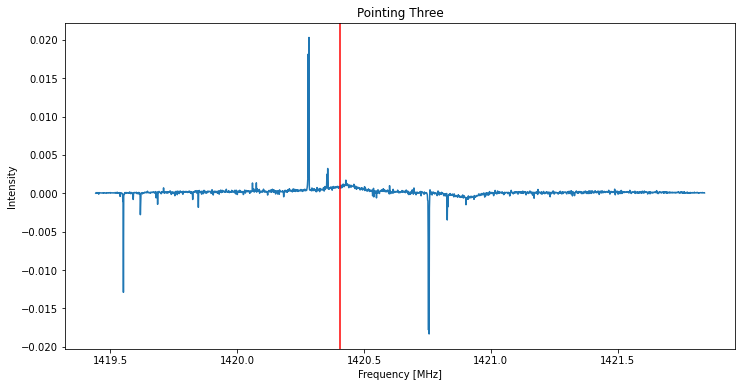

In [677]:
plt.figure(figsize=(12,6))
data_gal3 = []
for dd in data[7:]:
    dat = table.Table.read(dd)['fsw_pow']#*(dat0['fsw_pow'] < 0.002)*(dat0['fsw_pow'] > -0.002)
    data_gal3.append(dat)
#np.median(data_gal3, axis=0)
#plt.axvline(0, color='red')
#plt.vlines(tes, ymin=-1, ymax=1, color='green')
#plt.xlim(-300, 200)
#plt.ylim(-0.0035, 0.0035)
plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.MHz), np.median(data_gal3, axis=0))#*(np.median(data_gal3, axis=0)>-0.01))
#plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.MHz), np.median(data_gal2, axis=0))
plt.title('Pointing Three')
plt.axvline(1420.405751, color='red')#*u.MHz)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Intensity')

In [601]:
coords = []
for im in data:
    dat = table.Table.read(im)
    head = fits.open(im)[1].header
    obstime = head['DATE-OBS']
    timob = Time(datetime(2000+int(obstime[:2]), int(obstime[2:4]), int(obstime[4:6]), int(obstime[7:9]), int(obstime[9:11]), int(obstime[11:])))
    co = SkyCoord(alt = float(head['--altitude'])*u.deg, az = float(head['--azimuth'])*u.deg, obstime = timob, frame = 'altaz', location = loc).galactic
    coords.append(co)

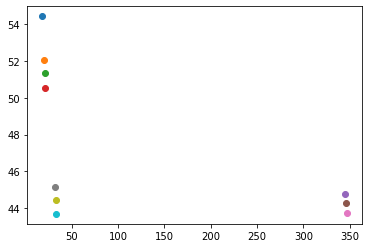

In [602]:
for co in coords:
    plt.scatter(co.l, co.b)
#plt.xlim(0,360)

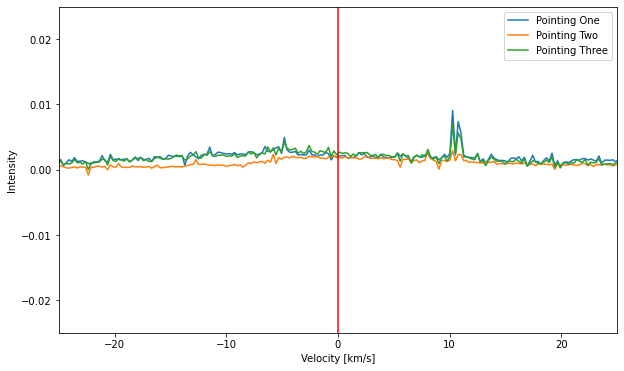

In [661]:
plt.figure(figsize=(10,6))
zen = dat0['fsw_pow']#*(dat0['fsw_pow'] < 0.002)*(dat0['fsw_pow'] > -0.002)

plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), np.sum(data_gal1, axis=0)-zen, label='Pointing One')

plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), np.sum(data_gal2, axis=0)-zen, label='Pointing Two')

plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), np.sum(data_gal3, axis=0)-zen, label='Pointing Three')
# u.km / u.s, equivalencies=freq_to_vel
plt.axvline(0, color='red')
#plt.axvline(1420.405751)#*u.MHz)
#plt.axvline(27, color='k')
plt.ylim(-0.025, 0.025)
plt.legend()
plt.xlabel('Velocity [km/s]')
plt.ylabel('Intensity')
plt.xlim(-25, 25)
#plt.plot((table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel), dat0['fsw_pow']*(dat0['fsw_pow'] < 0.005)*(dat0['fsw_pow'] > -0.005))
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/RadioLab/radiospectra.pdf')

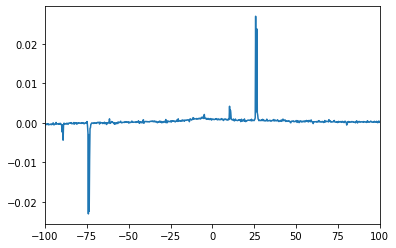

In [604]:
freq = (table.Table.read(dd)['freq1']*u.Hz).to(u.km / u.s, equivalencies=freq_to_vel)
med = np.median(data_gal1, axis=0)
plt.xlim(-100, 100)
plt.plot(freq[:], med[:])

In [605]:
pwd

'/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/RadioLab'

In [606]:
head = fits.open(data[0])[1].header
head

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                 2048 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'freq1   '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'freq2   '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'power1  '        

In [627]:
def get_obstime(obstime):
    x = Time(datetime(2000+int(obstime[:2]), int(obstime[2:4]), int(obstime[4:6]), int(obstime[7:9]), int(obstime[9:11]), int(obstime[11:])))
    return x

def get_galcoords(head):
    obstime = head['DATE-OBS']
    timob = Time(datetime(2000+int(obstime[:2]), int(obstime[2:4]), int(obstime[4:6]), int(obstime[7:9]), int(obstime[9:11]), int(obstime[11:])))
    co = SkyCoord(alt = float(head['--altitude'])*u.deg, az = float(head['--azimuth'])*u.deg, obstime = timob, frame = 'altaz', location = loc).galactic
    return co

In [628]:
data = glob('/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabThreeData/RadioLab/Data/*.fits')
lat = 29.651634*u.deg
lon = -82.324829*u.deg
loc = EarthLocation(lat=lat, lon=lon, height=117*u.m)

In [537]:
ob_id = []
ob_time = []
ob_alt = []
ob_az = []
ob_galong = []
ob_galat = []
ob_tint = []
i = 0
for im in data[:]:
    #dat = table.Table.read(im)
    head = fits.open(im)[1].header
    ob_id.append(i)
    obstime = get_obstime(head['DATE-OBS'])
    ob_time.append(obstime)
    ob_alt.append(head['--azimuth'])
    ob_az.append(head['--altitude'])
    ob_galong.append(get_galcoords(head).l)
    ob_galat.append(get_galcoords(head).b)
    ob_tint.append(head['TINT'])
    i+=1

In [632]:
names = ['Observation ID', 'Observation Time', 'Altitude', 'Azimuth', 'Gal. Longitude', 'Gal. Latitude', 'tint']
tblr = table.QTable([ob_id, ob_time, ob_alt, ob_az, ob_galong, ob_galat, ob_tint], names=names)
tblr.write('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/RadioLab/table.dat', format='latex', overwrite=True)

In [633]:
tblr

Observation ID,Observation Time,Altitude,Azimuth,Gal. Longitude,Gal. Latitude,tint
,,,,deg,deg,
int64,Time,str5,str4,float64,float64,int64
0,2022-09-22 19:12:00,125.8,87.5,41.25081715543127,75.36546495616105,60
1,2022-09-22 19:22:32,128.8,66.6,18.186327724383414,54.432877569693325,60
2,2022-09-22 19:33:36,128.8,66.6,20.229303665428397,52.0315301058366,60
3,2022-09-22 19:36:48,128.8,66.6,20.787633312414393,51.333512553712715,60
4,2022-09-22 19:40:24,128.8,66.6,21.40013451624622,50.54652166205323,60
5,2022-09-22 19:43:30,169.7,51.1,344.67839760408486,44.767894553194004,60
6,2022-09-22 19:46:45,169.7,51.1,345.5769822027306,44.28009261870978,60
7,2022-09-22 19:50:16,169.7,51.1,346.53083642571374,43.74293275712039,60


In [635]:
# Observation ID Galactic Longitude Galactic Latitude Velocity Peak of HI
names = ['Observation ID', 'Galactic Longitude', 'Galactic Latitude', 'Velocity Peak of HI']
tblr_2 = table.QTable([ob_id, ob_galong, ob_galat, peaks], names=names)
tblr_2

Observation ID,Galactic Longitude,Galactic Latitude,Velocity Peak of HI
,deg,deg,km / s
int64,float64,float64,float64
0,41.25081715543127,75.36546495616105,25.85942992530103
1,18.186327724383414,54.432877569693325,25.85942992530103
2,20.229303665428397,52.0315301058366,25.85942992530103
3,20.787633312414393,51.333512553712715,25.85942992530103
4,21.40013451624622,50.54652166205323,25.85942992530103
5,344.67839760408486,44.767894553194004,25.85942992530103
6,345.5769822027306,44.28009261870978,25.85942992530103
7,346.53083642571374,43.74293275712039,25.85942992530103
